In [4]:
from os import walk
import pandas as pd
import os
import autopep8
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from sklearn.cluster import DBSCAN

In [5]:
data_files_with_separators = [
    ('./data/smile.csv', ','),
    ('./data/2d-10c.dat', ' '),
    ('./data/square.data', ' '),
    ('./data/long.data', ' '),
    ('./data/order2-3clust.csv', ',')
]

data = dict()
for file_name, separator in data_files_with_separators:
    df = pd.read_csv(file_name, sep=separator, header=None)

    data[file_name] = {
        'number_of_classes': len(df[2].unique()),
        'data': df
    }

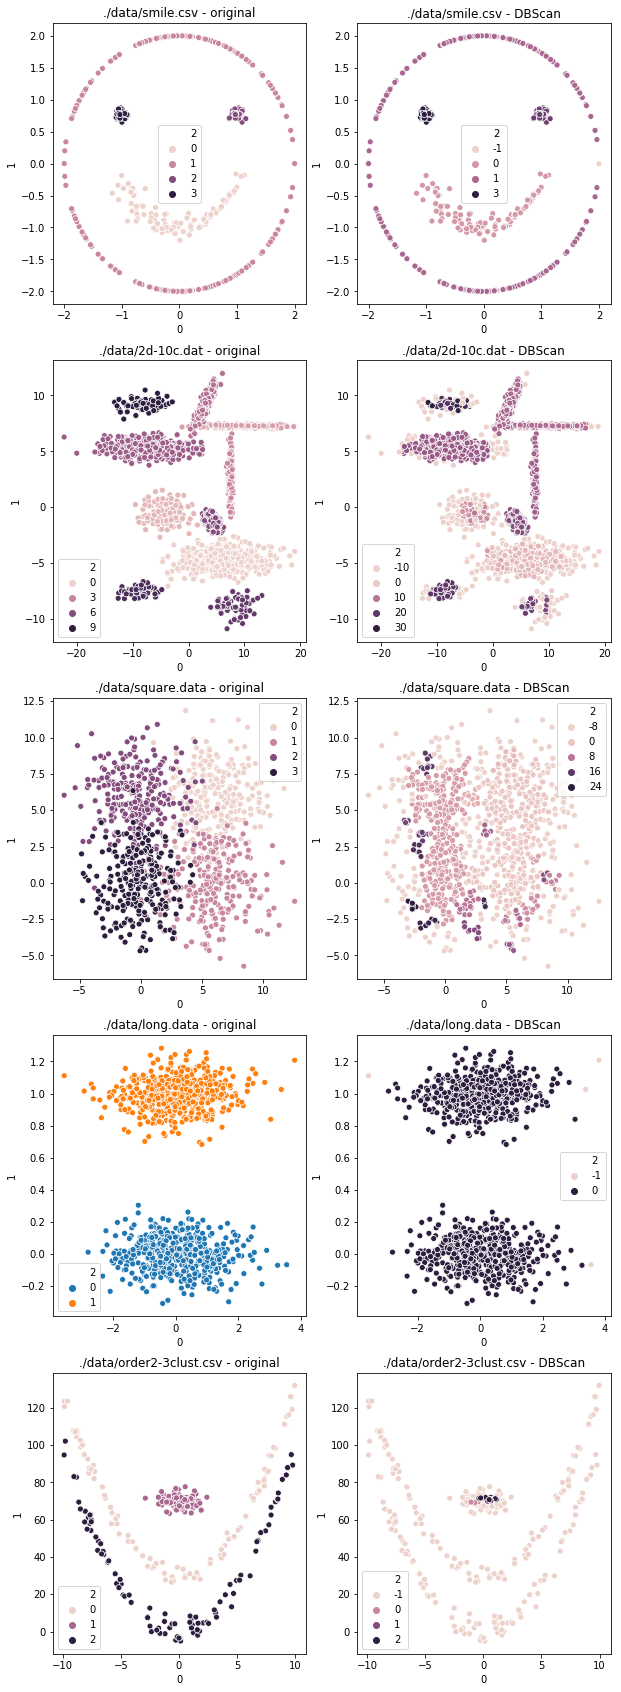

In [20]:
fig, axs = plt.subplots(nrows=len(data_files_with_separators), ncols=2, figsize=(10, 30))

idx = 0
for file_name, raw_data in data.items():
    
    # Original data plot
    g = sns.scatterplot(
        x=0,
        y=1,
        data=raw_data['data'], 
        hue=2, 
        ax=axs[idx][0]
    )
    axs[idx][0].set_title(file_name + " - original")
    
    # DBScan clustering
    clustering = DBSCAN().fit(raw_data['data'][[0, 1]])

    clustered_data = raw_data['data'].copy()
    clustered_data[2] = clustering.labels_
    g = sns.scatterplot(
        x=0,
        y=1,
        data=clustered_data, 
        hue=2, 
        ax=axs[idx][1]
    )
    axs[idx][1].set_title(file_name + " - DBScan")
    
    idx += 1